## Problem

### Choose stock data for a company in specific period (Month, year): For example '삼성' in Jan 2022

Let sdata=the dataframe of 삼성 in Jan, 2022 

Draw the graph of sdata in each column('Open', 'high', 'Low','Close')

Using the least square method by using the linear, quadratic and qubic polynomials, approximate the graph of sdata in each column

In [6]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt


def item_code_by_item_name(item_name):
    df_krx = pd.read_csv("krx.csv")

    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Code"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False


start, end= "2022", "2023"
cop = "NAVER"


In [7]:
df = fdr.DataReader(item_code_by_item_name(cop), start ,end)
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,379000,381000,375500,376000,378920,-0.006605
2022-01-04,376000,376000,365000,365500,803676,-0.027926
2022-01-05,362000,362000,352000,355000,1151703,-0.028728
2022-01-06,348500,349500,337500,338500,1280916,-0.046479
2022-01-07,338000,343500,337000,338000,787839,-0.001477
2022-01-10,339000,339500,329000,335000,828611,-0.008876
2022-01-11,336000,344500,334500,335000,805084,0.000000
2022-01-12,339500,352500,339500,345500,1047713,0.031343
2022-01-13,348000,352000,344000,348000,677226,0.007236


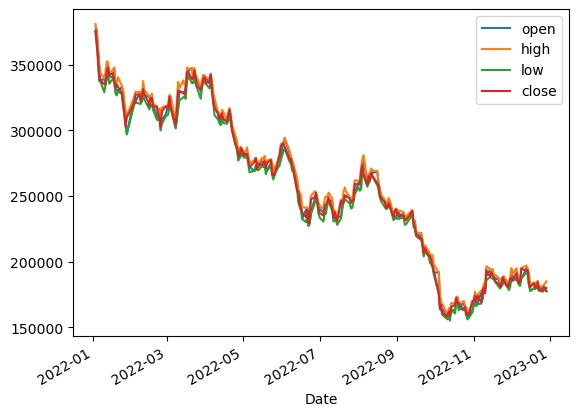

In [8]:
Open_data = df['Open']
High_data = df['High']
Low_data = df['Low']
Close_data = df['Close']
Open_data.plot(label = "open")
High_data.plot(label = "high")
Low_data.plot(label = "low")
Close_data.plot(label = "close")
plt.legend()
plt.show()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

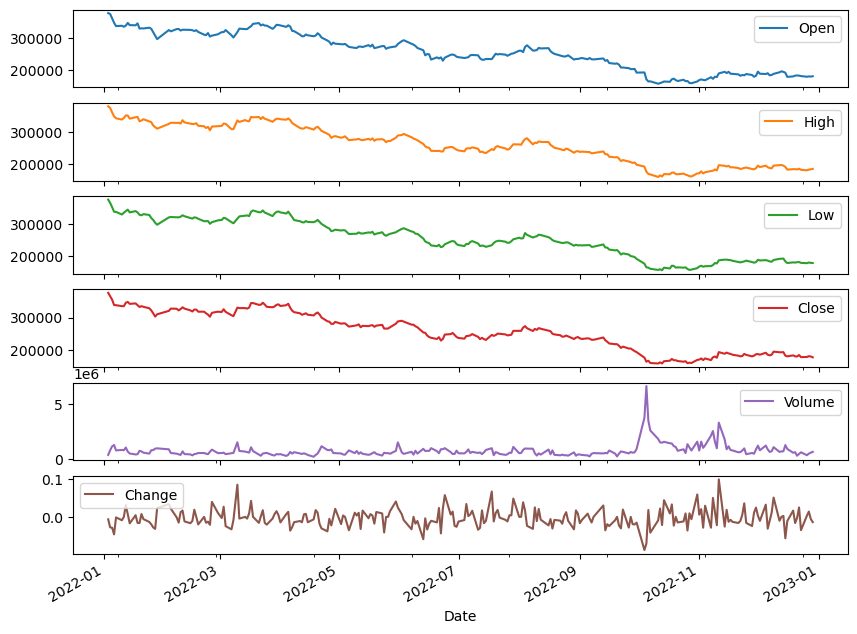

In [9]:
df[(df.index>f'{start}.01.01') & (df.index<f'{int(end)-1}.12.31')].plot(subplots=True, figsize=(10, 8))

In [11]:
from scipy import optimize
import numpy as np
#key values to acces the data
keys = ['Open' ,'High' ,'Low' ,'Close' ]
#listing up data
datas = [df[k].values for k in keys]
L = len(datas[0])
x = np.linspace(0, L-1, L)


In [13]:


fun1 = lambda x,a,b : a*x + b
fun2 = lambda x,a,b,c  : a*x**2 + b* x + c
fun3 = lambda x,a,b,c,d  : a*x**3 + b* x**2 + c*x + d

#listing up functions
f = [fun1 , fun2, fun3]

#save the coef as following the cases
#coef[ order ] [ kind_of_data]
coef = [[optimize.curve_fit(f[j], xdata = x, ydata = datas[i].T)[0] 
          for i in [0,1,2,3]]
         for j in [0,1,2]]


#Calculate an estimate using the coefficients inputed
c = lambda x,u : sum([u[len(u)-1-i]* x ** i for i in range(len(u))])



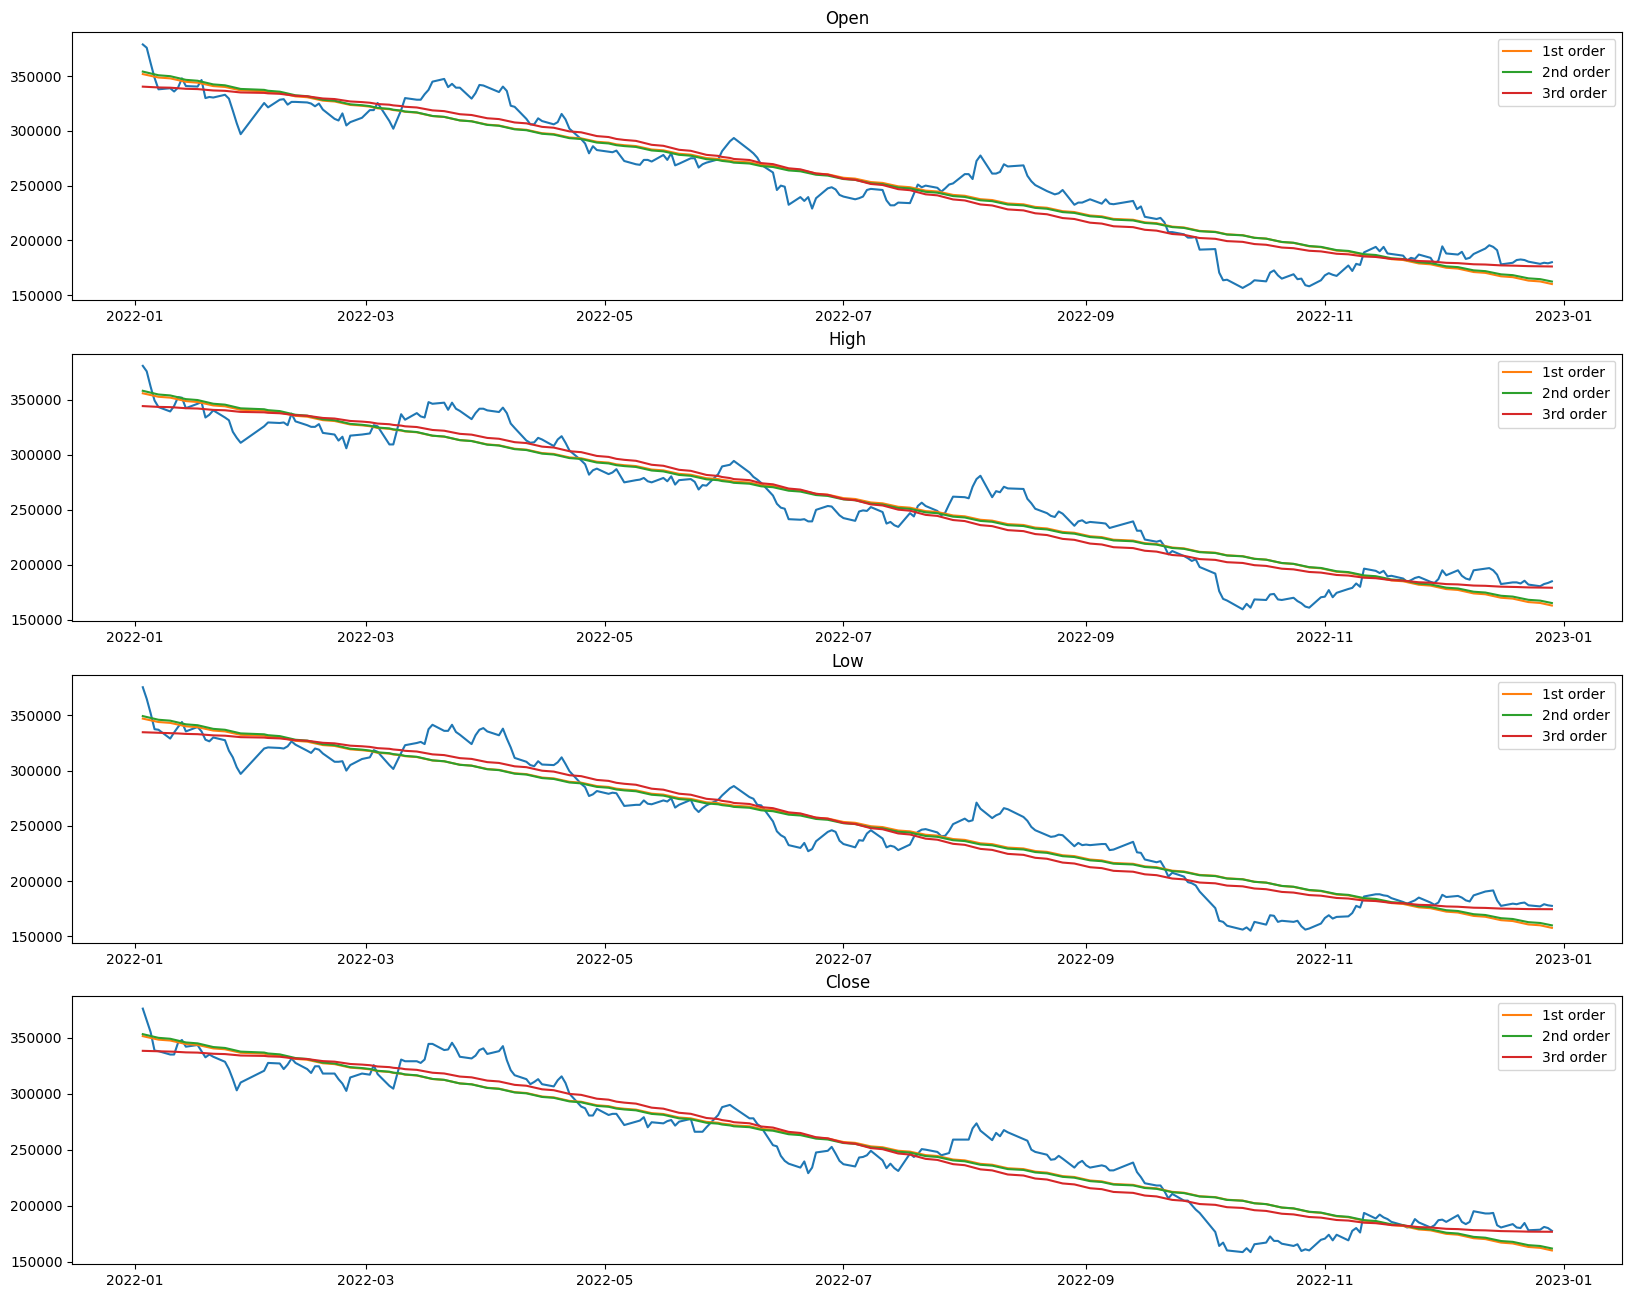

In [7]:
plt.figure(figsize = (20,16))
order = ["1st" , "2nd" , "3rd"]

row, col = 4,1 #subplot 위치조절

for i in range(4):
    plt.subplot(row,col,i+1)
    plt.title(keys[i])
    plt.plot(df[keys[0]].index , datas[i])
    
    for j in [0,1,2]:
        plt.plot(df[keys[0]].index , c(x , coef[j][i]) , label = f"{order[j]} order")
    #plt.xlabel('time')
    #plt.ylabel('stock')

    plt.legend()
plt.show()